In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
"""
Algorithm for kmeans
1) Read the binomial_flips into list
2) Apply Kmeans with 3 clusters and get the centroids
3) Get the clusterwise distribution.
4) Prior probabilities - number of points per cluster / 1000
5) Head probabilities - number of heads per cluster / 20
"""

'\nAlgorithm for kmeans\n1) Read the binomial_flips into list\n2) Apply Kmeans with 3 clusters and get the centroids\n3) Get the clusterwise distribution.\n4) Prior probabilities - number of points per cluster / 1000\n5) Head probabilities - number of heads per cluster / 20\n'

In [3]:
def get_x(fname):
    f = open(fname)
    return np.array([int(x) for x in f.readlines()])

x = get_x("Binomial_20_flips.txt").reshape(-1,1)
x.shape

(1000, 1)

In [7]:
"""
Algorithm for Binomial Mixture Model
1. ex = Compute the mean of the data points
2. Compute the mean and variance of the mixture distribution - 9.49, 9.50
3. Define the log likehood fn - 9.51 
4. Define the responsibility matrix fn - 9.56
5. Define the Nk
6. Define the EM iteration fn
"""

'\nAlgorithm for Binomial Mixture Model\n1. ex = Compute the mean of the data points\n2. Compute the mean and variance of the mixture distribution - 9.49, 9.50\n3. Define the log likehood fn - 9.51 \n4. Define the responsibility matrix fn - 9.56\n5. Define the Nk\n6. Define the EM iteration fn\n'

In [8]:
def initialize_params():
    theta = np.array([np.random.uniform(0,1) for i in range(3)])
    pi = np.array([np.random.uniform(0,1) for i in range(3)])
    return theta, pi

In [9]:
def E_step(data,pi,theta,no_of_clusters,no_of_tossses,no_of_experiments):
    si_mat = np.zeros((no_of_experiments,no_of_clusters))
    for i in range(no_of_experiments):
        factorial_cmp = math.factorial(no_of_tossses) // (math.factorial(no_of_tossses - no_of_clusters) * math.factorial(no_of_clusters))
        X = pi * factorial_cmp * (theta**data[i][0] * (1-theta)**(no_of_tossses - data[i][0]))
        si_mat[i] = X / np.sum(X)
    return si_mat

[121.12277212 233.31979612 645.55743175] [0.91036537 0.2873495  0.76831227]


In [10]:
def M_step(si_mat,data,no_of_experiments):
    n_k = np.sum(si_mat,axis=0)
    theta = (1/(20 * n_k)) * np.sum(si_mat * data,axis=0)
    pi = n_k/no_of_experiments
    return pi,theta

In [11]:
def log_likelihood(data,pi,theta,no_of_clusters,no_of_tossses,no_of_experiments):
    ll = 0
    for i in range(no_of_experiments):
        factorial_cmp = math.factorial(no_of_tossses) // (math.factorial(no_of_tossses - data[i][0]) * math.factorial(data[i][0]))
        theta_cmp = theta**data[i][0] * ((1-theta)**((no_of_tossses - data[i][0])))
        ll += (np.log(np.sum(factorial_cmp * theta_cmp * pi,axis=0)))
    return ll

In [92]:
#Plotting neg log likelihood
def plot_neg_likelihood_vs_iterations(iterations,likelihood_list):
    plt.plot(list(range(iterations-1)),likelihood_list)
    plt.title("Negative Log Likelihood vs No. of Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Negative Log Likelihood")
    plt.show()

In [86]:
def EM(x,pi,theta,no_of_clusters,no_of_experiments,no_of_tosses):
    iterations = 0
    ll = log_likelihood(x,pi,theta,no_of_clusters,no_of_tosses,no_of_experiments)
    lls = [ll]
    while 1:
        si = E_step(x,pi,theta,no_of_clusters,no_of_tosses,no_of_experiments)
        pi,theta = M_step(si,x,no_of_experiments)
        ll = log_likelihood(x,pi,theta,no_of_clusters,no_of_tosses,no_of_experiments)
        iterations+=1
        if abs(lls[-1] - ll) < 0.00001:
            break
        lls.append(ll)

    lls = [-x for x in lls[1:]]
    return iterations,pi,theta,lls

In [88]:
def print_params(pi,theta):
    for i in range(3):
        print("Prior probability for coin%s:%s"%(i+1,pi[i]))
        print("Probability of head for coin%s:%s"%(i+1,theta[i]))

Estimated Parameters by Kmeans clustering algorithm
Prior probability for coin1:0.341
Probability of head for coin1:0.6653958944281524
Prior probability for coin2:0.212
Probability of head for coin2:0.2646226415094358
Prior probability for coin3:0.447
Probability of head for coin3:0.8731543624161094
#################################################
Estimated Parameters by EM with random initialization
Prior probability for coin1:0.482759911161668
Probability of head for coin1:0.8522424168130606
Prior probability for coin2:0.2025707261457843
Probability of head for coin2:0.2586901834843252
Prior probability for coin3:0.3146693626925456
Probability of head for coin3:0.6656779880429029


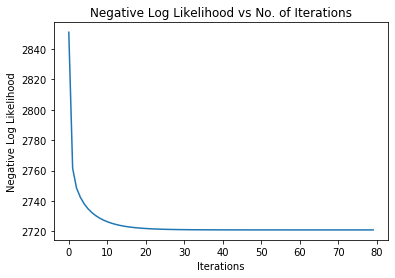

#################################################
Estimated Parameters by EM with Kmeans initialization
Prior probability for coin1:0.31530369152313953
Probability of head for coin1:0.6659352656434103
Prior probability for coin2:0.20261831177194986
Probability of head for coin2:0.2587294546111306
Prior probability for coin3:0.482077996704911
Probability of head for coin3:0.8523617131186518


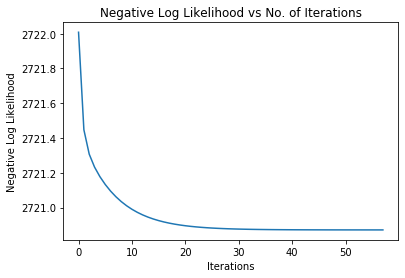

In [93]:
no_of_clusters = 3
no_of_tosses = 20
no_of_experiments = 1000

#Kmeans experiment
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
cluster_assignments = kmeans.labels_

coin1_points = cluster_assignments[cluster_assignments == 0]
coin2_points = cluster_assignments[cluster_assignments == 1]
coin3_points = cluster_assignments[cluster_assignments == 2]

coin1_pi = coin1_points.shape[0] / no_of_experiments
coin2_pi = coin2_points.shape[0] / no_of_experiments
coin3_pi = coin3_points.shape[0] / no_of_experiments

theta1 =  kmeans.cluster_centers_[0][0] / no_of_tosses
theta2 =  kmeans.cluster_centers_[1][0] / no_of_tosses
theta3 =  kmeans.cluster_centers_[2][0] / no_of_tosses

pi_kmeans = [coin1_pi,coin2_pi,coin3_pi]
theta_kmeans = [theta1,theta2,theta3]

print("Estimated Parameters by Kmeans clustering algorithm")
print_params(pi_kmeans,theta_kmeans)

# pi = np.array([0.333, 0.333, 0.333])
# theta = np.array([0.5, 0.6, 0.4])

#Non Kmeans initialization
pi,theta = initialize_params()
iterations,pi,theta,likelihood_list = EM(x,pi,theta,no_of_clusters,no_of_experiments,no_of_tosses)
print("#################################################")
print("Estimated Parameters by EM with random initialization")
print_params(pi,theta)
plot_neg_likelihood_vs_iterations(iterations,likelihood_list)



#Kmeans initialization
pi,theta = np.array(pi_kmeans),np.array(theta_kmeans)
iterations,pi,theta,likelihood_list = EM(x,pi,theta,no_of_clusters,no_of_experiments,no_of_tosses)
print("#################################################")
print("Estimated Parameters by EM with Kmeans initialization")
print_params(pi,theta)

plot_neg_likelihood_vs_iterations(iterations,likelihood_list)

Observations
1) EM with K means output has similar curve as Kmeans output or in fact also similar to random initialization output with respect to prior and head probabilities
2) We can see that negative log likelihood flattens out after 15-20 iterations in all the cases